In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_2015=pd.read_csv('2015.csv')
data_2016=pd.read_csv('2016.csv')
data_2017=pd.read_csv('2017.csv')
data_2018=pd.read_csv('2018.csv')
data_2019=pd.read_csv('2019.csv')

data_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2015.columns]
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.replace("."," ") for each in data_2017.columns]
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]

In [3]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [5]:
region_lists=list(data_2015['Region'].unique())
region_lists

['Western Europe',
 'North America',
 'Australia and New Zealand',
 'Middle East and Northern Africa',
 'Latin America and Caribbean',
 'Southeastern Asia',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Sub-Saharan Africa',
 'Southern Asia']

In [6]:
print("Are There Missing Data? :",data_2015.isnull().any().any())
print(data_2015.isnull().sum())

Are There Missing Data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


In [7]:
region_lists=list(data_2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
  region=data_2015[data_2015['Region']==each]
  region_happiness_rate=sum(region.Happiness_Score)/len(region)
  region_happiness_ratio.append(region_happiness_rate)

data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data =data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


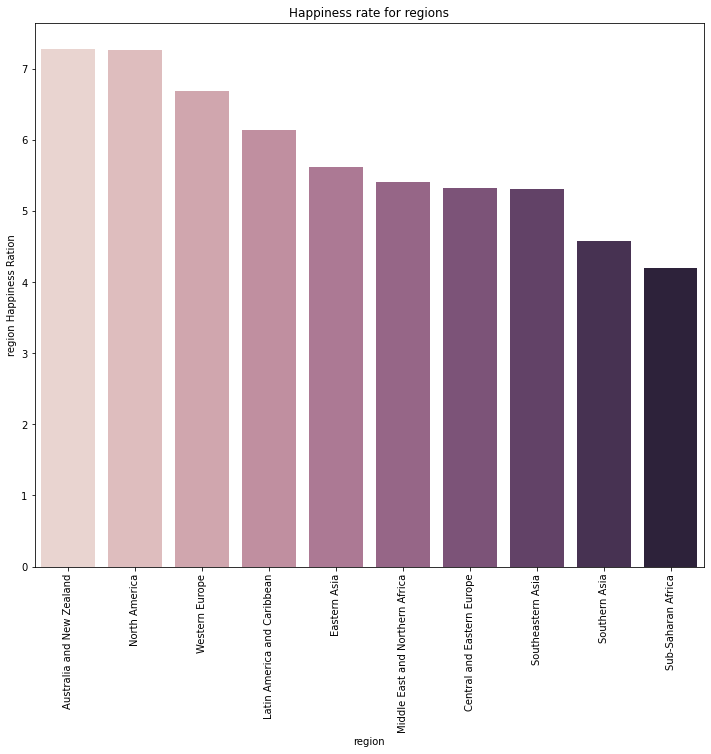

In [8]:
#barplot
plt.figure(figsize=(12,10))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))
plt.xticks(rotation = 90)
plt.xlabel('region')
plt.ylabel('region Happiness Ration')
plt.title('Happiness rate for regions')
plt.show()

In [9]:
region_lists=list(data_2015['Region'].unique())
region_economy_ratio=[]
for each in region_lists:
  region=data_2015[data_2015['Region']==each]
  region_economy_rate=sum(region.Economy)/len(region)
  region_economy_ratio.append(region_economy_rate)

data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=True)).index.values
sorted_data_economy =data_economy.reindex(new_index)

sorted_data_economy

,region,region_economy_ratio
2,Australia and New Zealand,1.291880
1,North America,1.360400
0,Western Europe,1.298596
4,Latin America and Caribbean,0.876815
7,Eastern Asia,1.151780
3,Middle East and Northern Africa,1.066973
6,Central and Eastern Europe,0.942438
5,Southeastern Asia,0.789054
9,Southern Asia,0.560486
8,Sub-Saharan Africa,0.380473


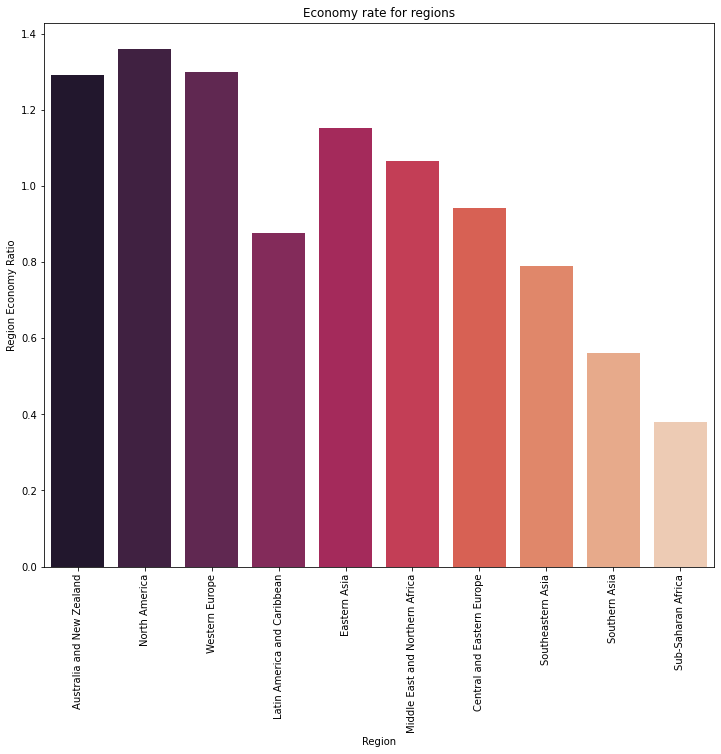

In [10]:
f,ax1=plt.subplots(figsize=(12,10))
sns.barplot(x=sorted_data_economy['region'],y=sorted_data_economy['region_economy_ratio'],palette="rocket",ax=ax1)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()

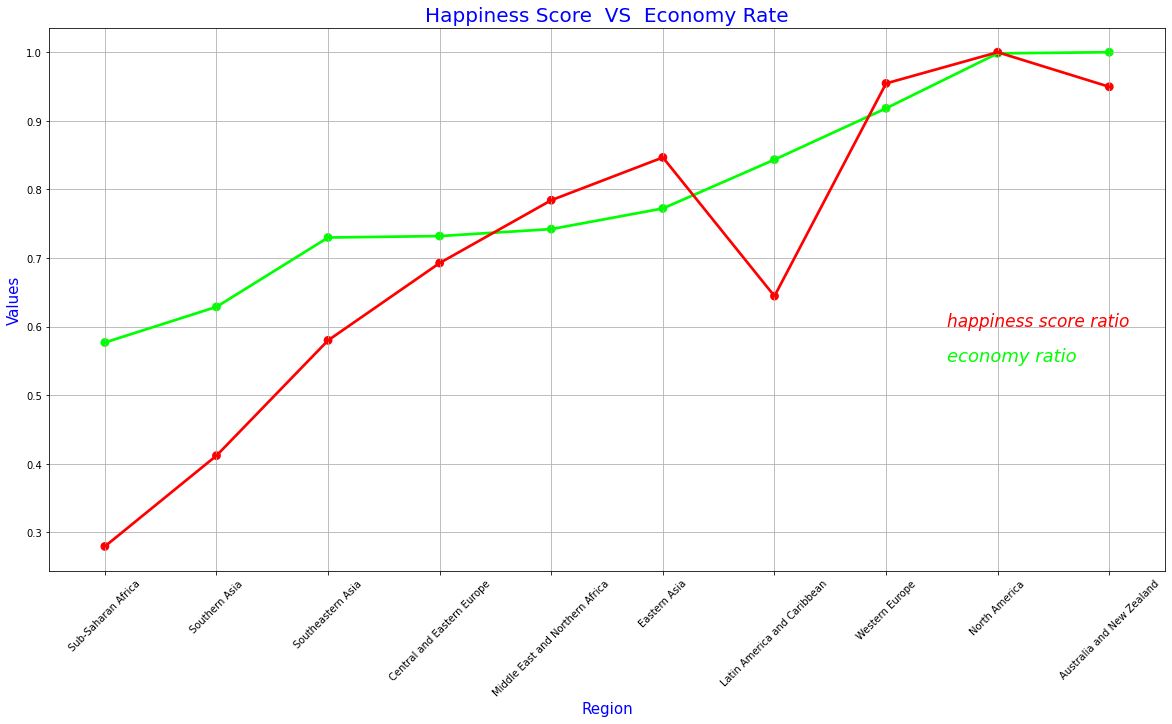

In [11]:
#Point plot
sorted_data['region_happiness_ratio']=sorted_data['region_happiness_ratio']/max(sorted_data['region_happiness_ratio'])
sorted_data_economy['region_economy_ratio']=sorted_data_economy['region_economy_ratio']/max(sorted_data_economy['region_economy_ratio'])

data=pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace=True)


f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='region',y='region_happiness_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='region',y='region_economy_ratio',data=data,color='red',alpha=0.8)
plt.text(7.55,0.6,'happiness score ratio',color='red',fontsize = 17,style = 'italic')
plt.text(7.55,0.55,'economy ratio',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Happiness Score  VS  Economy Rate',fontsize = 20,color='blue')
plt.grid()
plt.show()

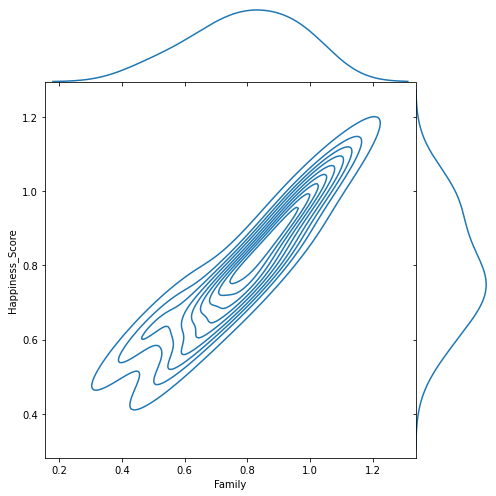

In [12]:
#jointplot
dataframe=pd.pivot_table(data_2015,index='Region',values=["Happiness_Score","Family"])
dataframe["Happiness_Score"]=dataframe["Happiness_Score"]/max(dataframe["Happiness_Score"])
dataframe["Family"]=dataframe["Family"]/max(dataframe["Family"])
sns.jointplot(dataframe.Family,dataframe.Happiness_Score,kind="kde",height=7,space=0)
plt.savefig('graph.png')
plt.show()

In [13]:
data_2015["Year"]=2015
data_2016["Year"]=2016
data_2017["Year"]=2017
data_concat=pd.concat([data_2015,data_2016,data_2017],axis=0,sort=False)
df=pd.pivot_table(data_concat,index='Year',values="Happiness_Score")
df

,Happiness_Score
Year,
2015,5.375734
2016,5.382185


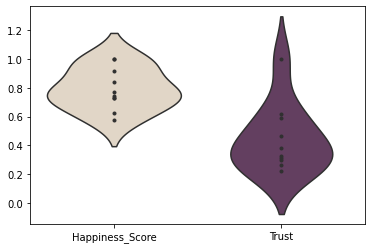

In [14]:
#violinplot
dataframe2=pd.pivot_table(data_2015,index='Region',values=["Happiness_Score","Trust"])
dataframe2["Happiness_Score"]=dataframe2["Happiness_Score"]/max(dataframe2["Happiness_Score"])
dataframe2["Trust"]=dataframe2["Trust"]/max(dataframe2["Trust"])
pal=sns.cubehelix_palette(2,rot=.5,dark=.3)
sns.violinplot(data=dataframe2,palette=pal,inner="points")
plt.show()